In [51]:
import sys
sys.path.append('../../pyutils')

import matplotlib.pyplot as plt
import numpy as np
import torch

import math
import random

import metrics

%matplotlib inline

# Definition

Let $f: \mathbb{R}^N \to \mathbb{R}$.  
Optimization is finding $x$ that minimizes $f(x)$.  
Maximizing $f(x)$ is the same as minimizing $-f(x)$.

# Scalar functions

$f: \mathbb{R} \to \mathbb{R}$.

$$f(x + \epsilon) \approx f(x) + \epsilon f'(x)$$

$$f(x - \epsilon \text{sign}(f'(x)) < f(x)$$
for $\epsilon$ small enough

We can thus reduce $f(x)$ by moving $x$ in small steps with opposite sign of $f'(x)$:
$$x \leftarrow x - \epsilon \text{sign}(f'(x))$$
This optimisation technique is called gradient descent.  

When $f'(x) = 0$, we are in a critical point, there are of 3 types:
- local minimum: $f(x)$ lower than all neighboring points
- local maximum: $f(x)$ greater than all neighboring points
- saddle points: neither minimum nor maximum

A global mimimum / maximum is a point $x$ with the lowest / largest value of $f(x)$.  
A local minimum is not necesseraly a global one.  
Applying gradient descent, we find a local minimum, that may be suboptimal compared to the global minimum.

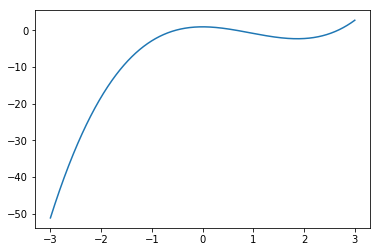

In [75]:
def compute_deriv(f, x):
    tx = torch.tensor(x, dtype=torch.float32, requires_grad=True)
    out = my_fun(tx)
    out.backward()
    return tx.grad.item()
    

def my_fun(x):
    return (x-2)**2 * (x+1) - 3 + x**2/5

z = np.linspace(-3, 3, 1000)
plt.plot(z, [my_fun(x) for x in z])
plt.show()

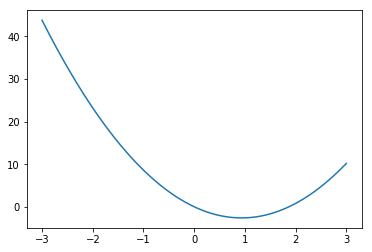

In [76]:
z = np.linspace(-3, 3, 1000)
plt.plot(z, [compute_deriv(my_fun, x) for x in z])
plt.show()

In [149]:
def gradient_descent(f, step, start = None, tol=1e-28, max_iters=1000):
    
    if start is None:
        start = random.random()
    
    x = start
    
    for its in range(max_iters):
        
        dx = compute_deriv(f, x)
        new_x = x - step * float(np.sign(dx))
        delta = (f(new_x) - f(x))**2
        x = new_x
        
        if delta**2 < tol:
            break
    
    return x

start = 2.5
res = gradient_descent(my_fun, 0.001, start=start)
print('f({}) = {} => f({}) = {}'.format(
    start, my_fun(start), res, my_fun(res)))

start = -1
res = gradient_descent(my_fun, 0.001, start=start)
print('f({}) = {} => f({}) = {}'.format(
    start, my_fun(start), res, my_fun(res)))

f(2.5) = -0.875 => f(1.8660000000000698) = -2.252146904
f(-1) = -2.8 => f(-1.9999999999998899) = -18.199999999997445


# Vector functions

$f: \mathbb{R}^n \to \mathbb{R}$.  

The gradient vector of $f(x)$ at the point $x$ is denoted $\nabla_x f(x)$.
$$(\nabla_x f(x))_i = \frac{\partial}{\partial x_i} f(x)$$

$x$ is a critical points if $\nabla_x f(x) = \vec{0}$.

The directional derivative in direction $u$ (unit vector) is the slope of $f$ in direction $u$ evaluated at $x$. this is:
$$\frac{\partial}{\partial \alpha} f(x + \alpha u) \space (\alpha = 0) = u^T \nabla_x f(x)$$  

We are looking for the direction $u$ that decreases $f$ the fastest:
$$\min_{u, u^Tu=1}u^T\nabla_x f(x)$$
$$ = \min_{u, u^Tu=1} ||u||_2 ||\nabla_x f(x)|| \cos \theta$$
$$ = \min_{u} \cos \theta$$
with $\theta$ the angle between $u$ and the gradient.  
The solution is $u$ pointing in the opposite direction of the gradient.  

Gradient descent in vector functions proposes the following update:
$$x \leftarrow x - \epsilon \nabla_x f(x)$$

with $\sigma \in \mathbb{R}$, $\sigma > 0$ the learning rate, might be chosen:
- small constant
- line search: try several values, take the ones that reduce the most

It converges to local minima

In [165]:
N = 54
IN_SIZE = 8
HIDDEN = 5
OUT_SIZE = 1

X = torch.randn(N, IN_SIZE)
y = torch.randn(N, OUT_SIZE)

def my_net(W1, W2):
    
    out = torch.relu(X @ W1)
    out = out @ W2
    
    loss = torch.mean((out - y)**2)
    
    return loss

In [172]:
LR = 0.01

def gradient_descent(lr, niters=1000):
    
    W1 = torch.randn(IN_SIZE, HIDDEN, requires_grad=True)
    W2 = torch.randn(HIDDEN, OUT_SIZE, requires_grad=True)
    
    loss = my_net(W1, W2)
    
    for it in range(niters):
        
        loss = my_net(W1, W2)
        loss.backward()
        
        W1.data.sub_(lr * W1.grad.data)
        W2.data.sub_(lr * W2.grad.data)
        W1.grad.zero_()
        W2.grad.zero_()
        
        if it % 30 == 0:
            print('Iteration {}, loss = {}'.format(it+1,
                 loss.item()))
    
    return W1, W2
    

res_w1, res_w2 = gradient_descent(lr=LR)

Iteration 1, loss = 27.256473541259766
Iteration 31, loss = 2.3146841526031494
Iteration 61, loss = 1.4958083629608154
Iteration 91, loss = 1.2893446683883667
Iteration 121, loss = 1.213019847869873
Iteration 151, loss = 1.180122971534729
Iteration 181, loss = 1.1647608280181885
Iteration 211, loss = 1.157124400138855
Iteration 241, loss = 1.1530524492263794
Iteration 271, loss = 1.1506593227386475
Iteration 301, loss = 1.1490594148635864
Iteration 331, loss = 1.1478304862976074
Iteration 361, loss = 1.1467729806900024
Iteration 391, loss = 1.1458485126495361
Iteration 421, loss = 1.1451579332351685
Iteration 451, loss = 1.144492506980896
Iteration 481, loss = 1.143834114074707
Iteration 511, loss = 1.1431735754013062
Iteration 541, loss = 1.1425058841705322
Iteration 571, loss = 1.1418284177780151
Iteration 601, loss = 1.1411124467849731
Iteration 631, loss = 1.140347957611084
Iteration 661, loss = 1.1395683288574219
Iteration 691, loss = 1.1387735605239868
Iteration 721, loss = 1.137

# Jacobian and Hessian

Let $f: \mathbb{R}^m \to \mathbb{R}^n$.  
The Jacobian matrix $J \in \mathbb{R}^{n*m}$ contains all the partial derivates of $f$ at a particual point $x$:
$$J_{ij} = \frac{\partial}{\partial x_j} f(x)_i$$  

Let $f: \mathbb{R}^n \to \mathbb{R}$.  
The Hesian matrix $H \in \mathbb{R}^{n*n}$ contains all the second partial derivates of $f$ at a particular point $x$:
$$H_{ij} = \frac{\partial^2}{\partial x_i \partial x_j} f(x)$$  

The Hessian is the Jacobian of the gradient.  

If $f$ second partial derivative is continuous in $x$, the Hessian is symmetric.

The second derivative tells us is a gradient step will do as much improvement as we expected.  
Suppose we have a quadratic scalar function:
- $f''(x) = 0$: a gradient step will move exactly as expected by the gradient.
- $f''(x) > 0$: a gradient step will move less than expected.
- $f''(x) < 0$: a gradient step will move less than expected.  

If $x$ is a critical point, $f'(x)=0$, the second derivates gives more information:
- $f''(x) < 0$: $x$ is a local maximum
- $f''(x) > 0$: $x$ is a local minimum
- $f''(x) = 0$: may be any of the 3

In higher dimensions, we can look at the Hessian eigeinvalues to know what kind of critical point $x$ is ($\nabla_x f(x) = \vec{0}$):
- all eigenvalues are negative: $x$ is a local maximum
- all eigenvalues are positive: $x$ is a local minimum
- there is at least one positive and one negative eigenvalue: $x$ is a saddle point
- otherwhise: may be any of the 3

If the Hessian has a poor condition number, the second derivatives differ a lot from each other, and gradient descent performs poorly.  
We could use the information on the Hessian to guide the search.  

Newton's method use a second-order Taylor series expansion to make a quadratic approximation of $f$ near $x^{(0)}$:

$$f(x) \approx f(x^{(0)}) + (x - x^{(0)})^Tg + \frac{1}{2} (x - x^{(0)})^T H (x - x^{(0)})$$

with $g = \nabla_x f(x^{(0)})$ and $H$ the Hessian of $f$ at $x^{(0)}$.

Solving for a critical point, we obtain:
$$x^* = x^{(0)} - H^{-1}g$$

When $f$ is quadratic, only one update jumps to the minimum. Otherwhise, we can recursively make the update, it converges a lot faster than gradient descent.  
But newton's method are a lot more attracted to saddle points than gradient descent.

In [251]:
import torch.autograd as autograd

def compute_grad_hessian(loss, w):
    
    w_grad, = autograd.grad(loss, w, create_graph=True, retain_graph=True)
    
    hess = []
    for i in range(len(w_grad)):    
        hess.append(autograd.grad(w_grad[i], w,
                    create_graph=True, retain_graph=True)[0])
    
    w_hess = torch.stack(hess, dim=0)
    
    return w_grad, w_hess

beta = torch.randn(IN_SIZE, requires_grad = True)

l1_coef = 0.4

pred = X @ beta
err = (y.squeeze() - pred)
loss = (err @ err) + l1_coef * beta @ beta

beta_grad, beta_hess = compute_grad_hessian(loss, beta)


bgrad_ref = - 2 * X.t() @ (y.squeeze() - X @ beta) + 2 * l1_coef * beta
bhess_ref = 2 * X.t() @ X + 2 * l1_coef * torch.eye(len(beta))
print(beta_grad.shape, beta_hess.shape)
print(metrics.tdist(bgrad_ref.data.numpy(), beta_grad.data.numpy()))
print(metrics.tdist(bhess_ref.data.numpy(), beta_hess.data.numpy()))

torch.Size([8]) torch.Size([8, 8])
0.0
3.6603196e-05


In [252]:
import torch.autograd as autograd

torch.manual_seed(7)

W1 = torch.randn(IN_SIZE, HIDDEN)
W2 = torch.randn(HIDDEN, OUT_SIZE, requires_grad=True)

def my_net(b):
    
    out = torch.relu(X @ W1 + b)
    out = out @ W2
    
    loss = torch.mean((out - y)**2)
    
    return loss

b = torch.randn(HIDDEN, requires_grad=True)
    

loss = my_net(b)
b_grad, b_hess = compute_grad_hessian(loss, b)


print(b_grad.shape, b_hess.shape)
print(b_grad)
print(b_hess)

torch.Size([5]) torch.Size([5, 5])
tensor([ 2.2695,  5.0394, -1.0224, -0.0292, -0.1943], grad_fn=<ViewBackward>)
tensor([[ 1.9316,  0.8081, -0.2022, -0.0647, -0.7060],
        [ 0.8081,  3.3117, -0.5739, -0.0595, -1.0549],
        [-0.2022, -0.5739,  0.1785,  0.0195,  0.2155],
        [-0.0647, -0.0595,  0.0195,  0.0074,  0.0455],
        [-0.7060, -1.0549,  0.2155,  0.0455,  1.3261]],
       grad_fn=<StackBackward>)


In [269]:
LR = 0.01

def newton_method(lr, niters=100):
    
    b = torch.randn(HIDDEN, requires_grad=True)
    
    loss = my_net(b)
    
    for it in range(niters):
        
        loss = my_net(b)
        b_grad, b_hess = compute_grad_hessian(loss, b)
        
        with torch.no_grad():
            db = torch.inverse(b_hess) @ b_grad
            b.data.sub_(lr * db.data)
        
        if it % 10 == 0:
            print('Iteration {}, loss = {}'.format(it+1,
                 loss.item()))
    
    return b

res_b = newton_method(lr=LR)

Iteration 1, loss = 21.246177673339844
Iteration 11, loss = 18.76519203186035
Iteration 21, loss = 16.528507232666016
Iteration 31, loss = 14.489789962768555
Iteration 41, loss = 12.661669731140137
Iteration 51, loss = 11.081941604614258
Iteration 61, loss = 9.753718376159668
Iteration 71, loss = 8.629889488220215
Iteration 81, loss = 7.7066826820373535
Iteration 91, loss = 6.889970779418945
